<a href="https://colab.research.google.com/github/Ancy-padmanabhan/Assignments/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#make 'PassengerID' as the index column
data.set_index('PassengerId', inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

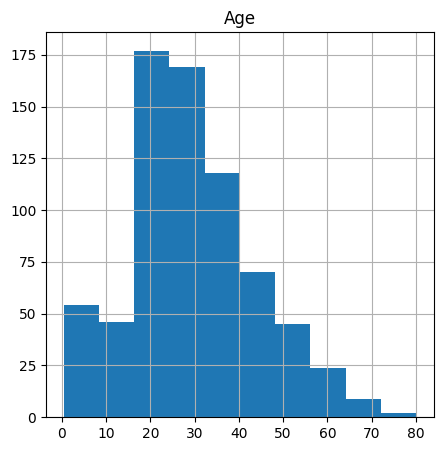

In [8]:
data.hist(column='Age',figsize=(5,5))

In [9]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [10]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7bba6402f4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7bba6402fa00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bba6402f220>],
 'medians': [<matplotlib.lines.Line2D at 0x7bba6402ff40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bba64068220>],
 'means': []}

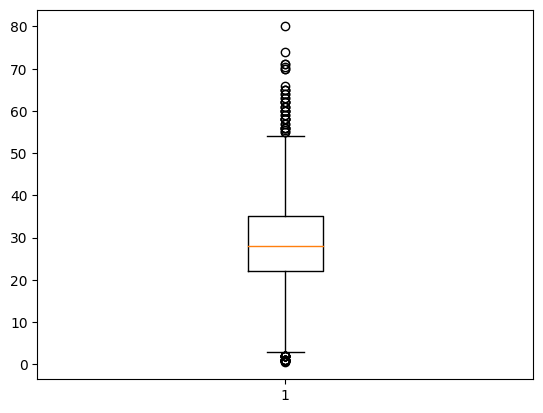

In [11]:
plt.boxplot(data['Age'])

In [12]:
Q1=np.percentile(data['Age'],25,method='midpoint')
Q2=np.percentile(data['Age'],50,method='midpoint')
Q3=np.percentile(data['Age'],75,method='midpoint')
print('Q1 is',Q1)
print('Q2 is',Q2)
print('Q3 is',Q3)

Q1 is 22.0
Q2 is 28.0
Q3 is 35.0


In [13]:
IQR=Q3-Q1
IQR

13.0

In [14]:
low_limit= Q1 - 1.5 * IQR
upp_limit= Q3 + 1.5 * IQR
print('lower limit :',low_limit)
print('Upper limit :',upp_limit)

lower limit : 2.5
Upper limit : 54.5


In [15]:
outlier=[]
for x in data['Age']:
  if((x > upp_limit) or (x < low_limit)):
    outlier.append(x)
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [16]:
# Clipping the outliers in Age Column
data['Age'] = data['Age'].clip(lower=low_limit , upper=upp_limit)

In [17]:
outlier=[]
for x in data['Age']:
  if((x > upp_limit) or (x < low_limit)):
    outlier.append(x)
outlier

[]

{'whiskers': [<matplotlib.lines.Line2D at 0x7bba640c39d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7bba640c3f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bba640c3730>],
 'medians': [<matplotlib.lines.Line2D at 0x7bba640f8490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bba640f8730>],
 'means': []}

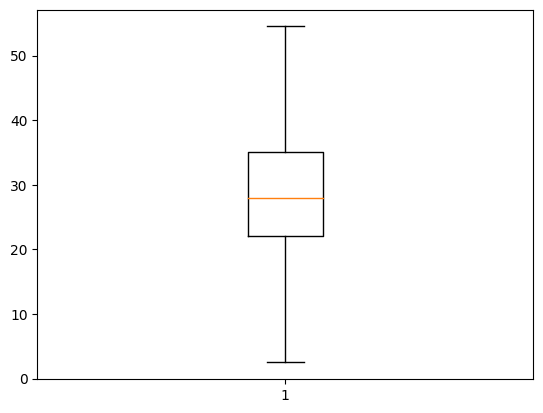

In [18]:
plt.boxplot(data['Age'])

In [19]:
#drop the Cabin column as 77% of the columns are null values
data['Cabin']=data['Cabin'].fillna(data['Cabin'].value_counts().index[0])

In [20]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [21]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [22]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

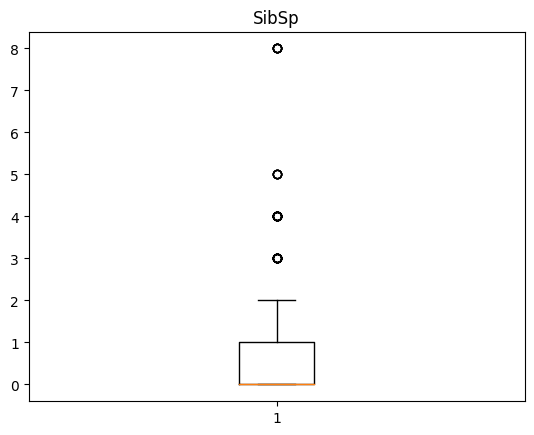

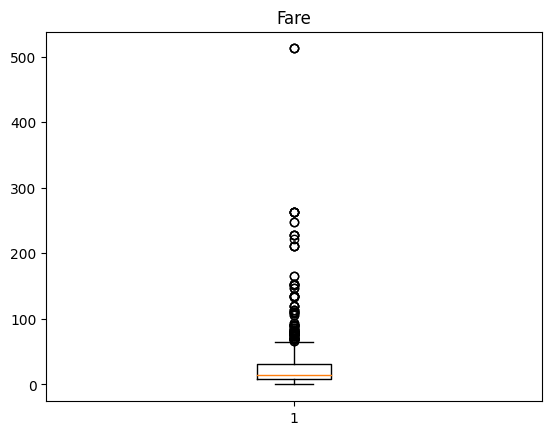

In [23]:
#Finding outliers for SibSp and Fare columns
num_cols={'SibSp','Fare'}
for i in num_cols:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

In [24]:
#Finding and deleting outliers for Fare
Q1_1=np.percentile(data['Fare'],25,method='midpoint')
Q2_1=np.percentile(data['Fare'],50,method='midpoint')
Q3_1=np.percentile(data['Fare'],75,method='midpoint')
print('Q1 is',Q1_1)
print('Q2 is',Q2_1)
print('Q3 is',Q3_1)

Q1 is 7.9104
Q2 is 14.4542
Q3 is 31.0


In [25]:
IQR1=Q3_1-Q1_1
IQR1

23.0896

In [26]:
low_limit1= Q1_1 - 1.5 * IQR1
upp_limit1= Q3_1 + 1.5 * IQR1
print('lower limit :',low_limit1)
print('Upper limit :',upp_limit1)

lower limit : -26.724
Upper limit : 65.6344


In [27]:
data['Fare'] = data['Fare'].clip(lower=low_limit1 , upper=upp_limit1)

In [28]:
outlier1=[]
for x in data['Fare']:
  if((x > upp_limit1) or (x < low_limit1)):
    outlier1.append(x)
outlier1

[]

{'whiskers': [<matplotlib.lines.Line2D at 0x7bba63ffded0>,
 'caps': [<matplotlib.lines.Line2D at 0x7bba63ffe590>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bba63ffdde0>],
 'medians': [<matplotlib.lines.Line2D at 0x7bba63fff730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bba63e1d5a0>],
 'means': []}

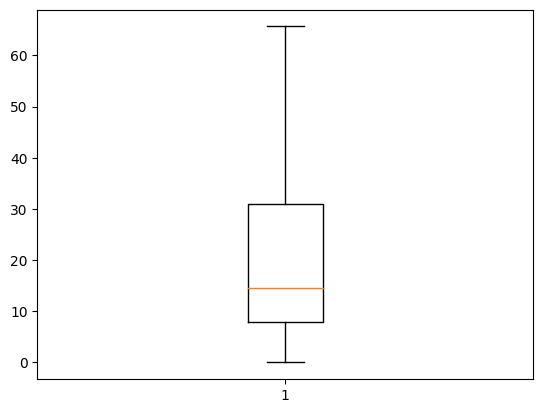

In [29]:
plt.boxplot(data['Fare'])

In [30]:
#Finding and deleting outliers for SibSp
Q1_2=np.percentile(data['SibSp'],25,method='midpoint')
Q2_2=np.percentile(data['SibSp'],50,method='midpoint')
Q3_2=np.percentile(data['SibSp'],75,method='midpoint')
print('Q1 is',Q1_2)
print('Q2 is',Q2_2)
print('Q3 is',Q3_2)

Q1 is 0.0
Q2 is 0.0
Q3 is 1.0


In [31]:
IQR2=Q3_2-Q1_2
IQR2

1.0

In [32]:
low_limit2= Q1_2 - 1.5 * IQR2
upp_limit2= Q3_2 + 1.5 * IQR2
print('lower limit :',low_limit2)
print('Upper limit :',upp_limit2)

lower limit : -1.5
Upper limit : 2.5


In [33]:
outlier2=[]
for x in data['SibSp']:
  if((x > upp_limit2) or (x < low_limit2)):
    outlier2.append(x)
outlier2

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [34]:
data['SibSp'] = data['SibSp'].clip(lower=low_limit2 , upper=upp_limit2)

In [35]:
outlier2=[]
for x in data['SibSp']:
  if((x > upp_limit2) or (x < low_limit2)):
    outlier2.append(x)
outlier2

[]

{'whiskers': [<matplotlib.lines.Line2D at 0x7bba63e70070>,
 'caps': [<matplotlib.lines.Line2D at 0x7bba63e705b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bba63e43d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7bba63e70af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bba63e70d90>],
 'means': []}

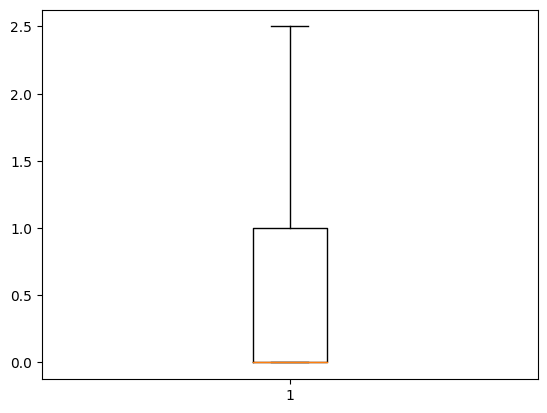

In [36]:
plt.boxplot(data['SibSp'])

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [42]:
X=data.iloc[:,[1,4]]
y=data.iloc[:,0]

In [43]:
X.head()

,Pclass,Age
PassengerId,,
1,3,22.0
2,1,38.0
3,3,26.0
4,1,35.0
5,3,35.0


In [44]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=50)

In [48]:
X_train.head()

,Pclass,Age
PassengerId,,
359,3,28.0
332,1,45.5
355,3,28.0
375,3,3.0
360,3,28.0


In [49]:
scaler = MinMaxScaler().fit(X_train)
print(scaler)


MinMaxScaler()


In [53]:
scaler.data_min_


array([1. , 2.5])

In [52]:
scaler.data_max_

array([ 3. , 54.5])

In [54]:
scaler.feature_range

(0, 1)

In [55]:
scaler.transform(X_train)

array([[1.        , 0.49038462],
       [0.        , 0.82692308],
       [1.        , 0.49038462],
       ...,
       [1.        , 0.49038462],
       [1.        , 0.125     ],
       [1.        , 0.29807692]])

In [57]:
X_train_scaled = scaler.transform(X_train)
print(X_train_scaled)

[[1.         0.49038462]
 [0.         0.82692308]
 [1.         0.49038462]
 ...
 [1.         0.49038462]
 [1.         0.125     ]
 [1.         0.29807692]]
